In [114]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [115]:
df=pd.read_csv('train.csv')
print(df.sample())
# df.shape()

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
35524      0       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
35524       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
35524         0         0         0         0         0  

[1 rows x 785 columns]


In [ ]:
# normalise the data

X=df.drop(['label'],axis=1)
y=df['label']

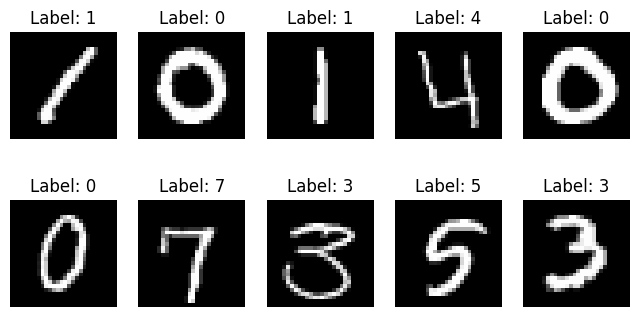

In [117]:
images = X.values.reshape(-1, 28, 28)

# 4️⃣ Show a few sample digits
plt.figure(figsize=(8, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i], cmap='gray')   # grayscale
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
# plt.tight_layout()
plt.show()




In [118]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [119]:
scaler = MinMaxScaler()     # scales each pixel to [0, 1]
X_scaled = scaler.fit_transform(X)
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [120]:
print("Before scaling:", X.min(), X.max())
print("After scaling:", X_scaled.min(), X_scaled.max())
print("Mean:", X_scaled.mean(), "Std:", X_scaled.std())


Before scaling: pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64 pixel0       0
pixel1       0
pixel2       0
pixel3       0
pixel4       0
            ..
pixel779    62
pixel780     0
pixel781     0
pixel782     0
pixel783     0
Length: 784, dtype: int64
After scaling: 0.0 1.0
Mean: 0.1310180729037736 Std: 0.3085439441873858


In [ ]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=150)   # keep top 100 features (can tune later)
X_pca = pca.fit_transform(X_scaled)

print("Original shape:", X_scaled.shape)
print("After PCA shape:", X_pca.shape)
print(pca.explained_variance_ratio_.sum())  # total variance explained

Original shape: (42000, 784)
After PCA shape: (42000, 150)
0.9485559159989418


In [ ]:
explained_variance = np.sum(pca.explained_variance_ratio_)
print(f"Total variance retained: {explained_variance*100:.2f}%")



Total variance retained: 94.86%


In [ ]:
# X_pca.shape
X_train,X_test,y_train,y_test=train_test_split(X_pca,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape


((33600, 150), (8400, 150))

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 91.79%
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       816
           1       0.96      0.98      0.97       909
           2       0.92      0.90      0.91       846
           3       0.91      0.88      0.90       937
           4       0.92      0.93      0.92       839
           5       0.85      0.87      0.86       702
           6       0.92      0.96      0.94       785
           7       0.94      0.92      0.93       893
           8       0.90      0.88      0.89       835
           9       0.90      0.90      0.90       838

    accuracy                           0.92      8400
   macro avg       0.92      0.92      0.92      8400
weighted avg       0.92      0.92      0.92      8400

Confusion Matrix:
[[787   0   2   0   2  11   9   2   2   1]
 [  0 888   2   3   1   4   1   3   7   0]
 [  7   9 759  10  10   8  15   8  19   1]
 [  2   3  18 826   0  42   3   7  23  13]
 [  3   2  

In [125]:
# testing model
testdata=pd.read_csv('test.csv')
print(testdata.sample())
X_test_final=testdata.values
X_test_final = scaler.transform(X_test_final)
X_test_final = pca.transform(X_test_final)
y_test_final = model.predict(X_test_final)

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
13335       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
13335       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
13335         0         0         0         0         0  

[1 rows x 784 columns]


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [126]:
accuracy_final = accuracy_score(y_test_final, y_test_final)
print(f"Final Test Accuracy: {accuracy_final*100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test_final, y_test_final))

Final Test Accuracy: 100.00%
Confusion Matrix:
[[2775    0    0    0    0    0    0    0    0    0]
 [   0 3275    0    0    0    0    0    0    0    0]
 [   0    0 2756    0    0    0    0    0    0    0]
 [   0    0    0 2743    0    0    0    0    0    0]
 [   0    0    0    0 2761    0    0    0    0    0]
 [   0    0    0    0    0 2499    0    0    0    0]
 [   0    0    0    0    0    0 2793    0    0    0]
 [   0    0    0    0    0    0    0 2917    0    0]
 [   0    0    0    0    0    0    0    0 2704    0]
 [   0    0    0    0    0    0    0    0    0 2777]]


In [151]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import pandas as pd
df=pd.read_csv('train.csv')

X=df.drop(['label'],axis=1)
y=df['label']
# 1. Split before scaling/PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Scale
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. PCA
pca = PCA(n_components=150)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 4. Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)

# 5. Evaluate
y_pred = model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 91.74%
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       816
           1       0.96      0.98      0.97       909
           2       0.92      0.89      0.91       846
           3       0.91      0.89      0.90       937
           4       0.92      0.93      0.92       839
           5       0.84      0.87      0.85       702
           6       0.92      0.96      0.94       785
           7       0.94      0.92      0.93       893
           8       0.90      0.88      0.89       835
           9       0.89      0.90      0.90       838

    accuracy                           0.92      8400
   macro avg       0.92      0.92      0.92      8400
weighted avg       0.92      0.92      0.92      8400

Confusion Matrix:
[[785   0   2   0   2  14   8   2   2   1]
 [  0 888   2   3   1   4   1   3   7   0]
 [  6  10 757  12  10   8  15   8  19   1]
 [  2   3  16 830   0  39   3   8  23  13]
 [  2   2  

In [152]:
joblib.dump(scaler, "scaler.pkl")
joblib.dump(pca, "pca.pkl")
joblib.dump(model, "digit_model.pkl")

print("✅ Model, PCA, and Scaler saved successfully!")


✅ Model, PCA, and Scaler saved successfully!


Predicted digit: 1


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


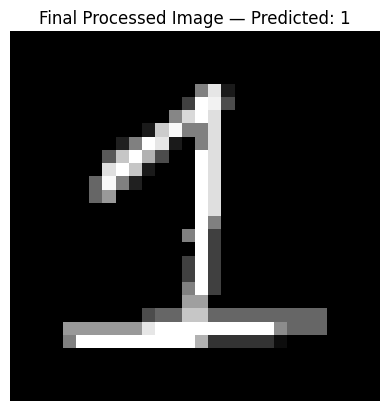

In [150]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your image
img = cv2.imread("1new.png", cv2.IMREAD_GRAYSCALE)

# 1️⃣ Invert image if needed (white digit on black background)
if np.mean(img) > 127:  # means background is light
    img = cv2.bitwise_not(img)

# 2️⃣ Threshold to binary (remove gray background)
_, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 3️⃣ Find bounding box around the digit (crop)
coords = cv2.findNonZero(img)
x, y, w, h = cv2.boundingRect(coords)
img = img[y:y+h, x:x+w]

# 4️⃣ Resize to 20x20 (keeping aspect ratio)
img = cv2.resize(img, (20, 20), interpolation=cv2.INTER_AREA)

# 5️⃣ Pad to 28x28 (MNIST style)
img_padded = np.pad(img, ((4, 4), (4, 4)), mode='constant', constant_values=0)

# 6️⃣ Flatten & scale
img_flat = img_padded.flatten().astype('float32').reshape(1, -1)
img_scaled = scaler.transform(img_flat)   # use SAME scaler from training

# 7️⃣ PCA transform
img_pca = pca.transform(img_scaled)

# 8️⃣ Predict
pred = model.predict(img_pca)
print("Predicted digit:", pred[0])

# 9️⃣ Visualize final input to model
plt.imshow(img_padded, cmap='gray')
plt.title(f"Final Processed Image — Predicted: {pred[0]}")
plt.axis('off')
plt.show()
